1.   QOMARUDIN SIFAK				(1301190396)
2.   MUHAMMAD RIFQI ARRAHIM N		(1301190425)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: ignored

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Eksplorasi dan Persiapan Data

## Dataset

In [92]:
df = pd.read_csv('kendaraan_train.csv')
test = pd.read_csv('kendaraan_test.csv')

### Data Train

In [93]:
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


### Data Test

In [94]:
test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


## Data Exploration

In [95]:
# Check dimensi data (rows, columns)
df.shape

(285831, 12)

In [96]:
# Check data types setiap columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


## Dealing with Missing Value

In [97]:
# Check missing value 
count_nan_in_data = df.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_data))

Count of NaN: 142916


In [98]:
# dealing with missing value
# rule : 
# 1. jika data type categorical : maka cara yang digunakan untuk mengisi data tersebut adalah menggunakan modus dari column itu.
# 2. jika data type numeric : maka cara yang digunakan untuk mengisi data tersbut adalah menggunakan mean dari column itu.
# 3. column kode daerah dan kanal penjualan di isi menggunakan modus dari column tersebut.
for col_name in df.columns:
  if df[col_name].dtypes == "object" or col_name == "Kode_Daerah" or col_name == "Kanal_Penjualan":
    df[col_name].fillna(df[col_name].mode()[0], inplace=True)
  else:
    df[col_name].fillna(df[col_name].mean(), inplace=True)

## Change Categorical Data to Numeric Value



In [99]:
# Mengambil object value dari Umur_Kendaraan, Jenis_Kelamin, dan Kendaraan_Rusak
print("Umur_Kendaraan => ", df["Umur_Kendaraan"].unique())
print("Jenis_Kelamin => ", df['Jenis_Kelamin'].unique())
print("Kendaraan_Rusak => ", df["Kendaraan_Rusak"].unique())

Umur_Kendaraan =>  ['< 1 Tahun' '> 2 Tahun' '1-2 Tahun']
Jenis_Kelamin =>  ['Wanita' 'Pria']
Kendaraan_Rusak =>  ['Tidak' 'Pernah']


In [100]:
# 1. jenis kelamin   : Wanita : 0 
#                      Pria   : 1
# 2. kendaraan rusak : Tidak  : 0
#                      Pernah : 1
dataConvertion = {    
    "Jenis_Kelamin" : {"Wanita":0, "Pria":1},
    "Kendaraan_Rusak" : {"Tidak":0, "Pernah":1}
}

# Mengubah object value ke numeric value
df = df.replace(dataConvertion)
test = test.replace(dataConvertion)
df.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30.0,1.0,33.0,1.0,< 1 Tahun,0,28029.0,152.0,97.0,0
1,2,1,48.0,1.0,39.0,0.0,> 2 Tahun,1,25800.0,29.0,158.0,0
2,3,1,21.0,1.0,46.0,1.0,< 1 Tahun,0,32733.0,160.0,119.0,0
3,4,0,58.0,1.0,48.0,0.0,1-2 Tahun,0,2630.0,124.0,63.0,0
4,5,1,50.0,1.0,35.0,0.0,> 2 Tahun,1,34857.0,88.0,194.0,0


In [101]:
# Membagi column Umur_Kendaraan menjadi 
#   Umur_Kendaraan_1-2 Tahun
#   Umur_Kendaraan_< 1 Tahun
#   Umur_Kendaraan_> 2 Tahun 
df = pd.get_dummies(df)
test = pd.get_dummies(test)
df.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
0,1,0,30.0,1.0,33.0,1.0,0,28029.0,152.0,97.0,0,0,1,0
1,2,1,48.0,1.0,39.0,0.0,1,25800.0,29.0,158.0,0,0,0,1
2,3,1,21.0,1.0,46.0,1.0,0,32733.0,160.0,119.0,0,0,1,0
3,4,0,58.0,1.0,48.0,0.0,0,2630.0,124.0,63.0,0,1,0,0
4,5,1,50.0,1.0,35.0,0.0,1,34857.0,88.0,194.0,0,0,0,1


## Dealing with Duplicate Data

In [102]:
# Check duplicate data
df.duplicated().sum()

0

In [103]:
# Drop duplicate data
df = df.drop_duplicates()
df.duplicated().sum()

0

## Drop Unused Column

In [104]:
# Drop column tidak terpakai
df = df.drop(columns=["id"])

## Data Visualization

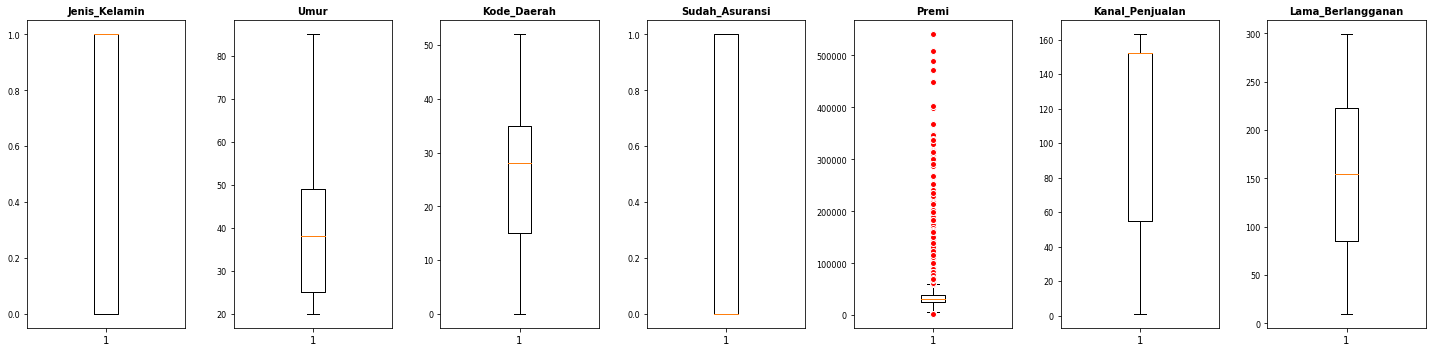

In [105]:
# Visualisasi coloumn Jenis Kelamin, Umur, Kode Daerah, Sudah Asuransi, Premi, Kanal Penjualan, dan Lama Berlangganan
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

list_col = ['Jenis_Kelamin', 'Umur', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']

fig, axs = plt.subplots(1, len(list_col), figsize=(20,5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df[list_col[i]], flierprops=red_circle)
    ax.set_title(list_col[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

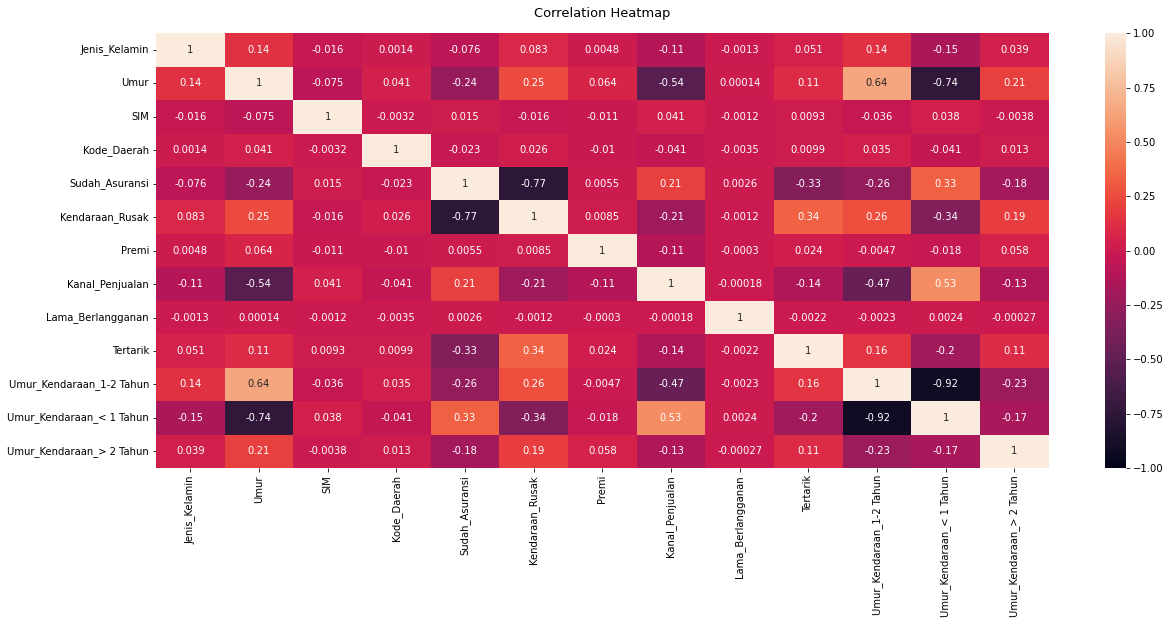

In [133]:
# Visualisasi korelasi data antar columns dengan menggunakan heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1).set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=16)

## Dealing with Outlier

In [106]:
# Menghapus outlier pada coloumn Premi
Q1 = df["Premi"].quantile(0.25)
Q3 = df["Premi"].quantile(0.75)
IQR=Q3-Q1
lower_whisker = Q1 - (1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)
df["Premi"] = df["Premi"].mask(df["Premi"] >upper_whisker, upper_whisker)
df["Premi"] = df["Premi"].mask(df["Premi"] <lower_whisker, lower_whisker)

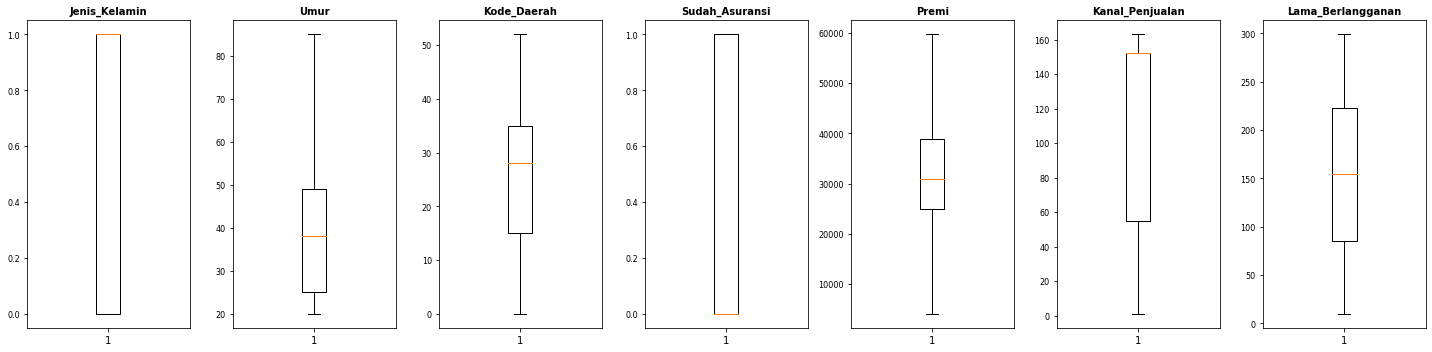

In [107]:
# Visualisasi boxplot setelah menghapus outlier
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

list_col = ['Jenis_Kelamin', 'Umur', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']

fig, axs = plt.subplots(1, len(list_col), figsize=(20,5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df[list_col[i]], flierprops=red_circle)
    ax.set_title(list_col[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()

## Data Split

In [108]:
# Splitting Data menjadi X, Y untuk data Train dan X_test, Y_test untuk data Test
X = df.drop(["Tertarik"],axis =1)
Y = df['Tertarik']
X_test = test.drop(["Tertarik"],axis =1)
Y_test = test['Tertarik']

C:\Users\salazarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Data Train')

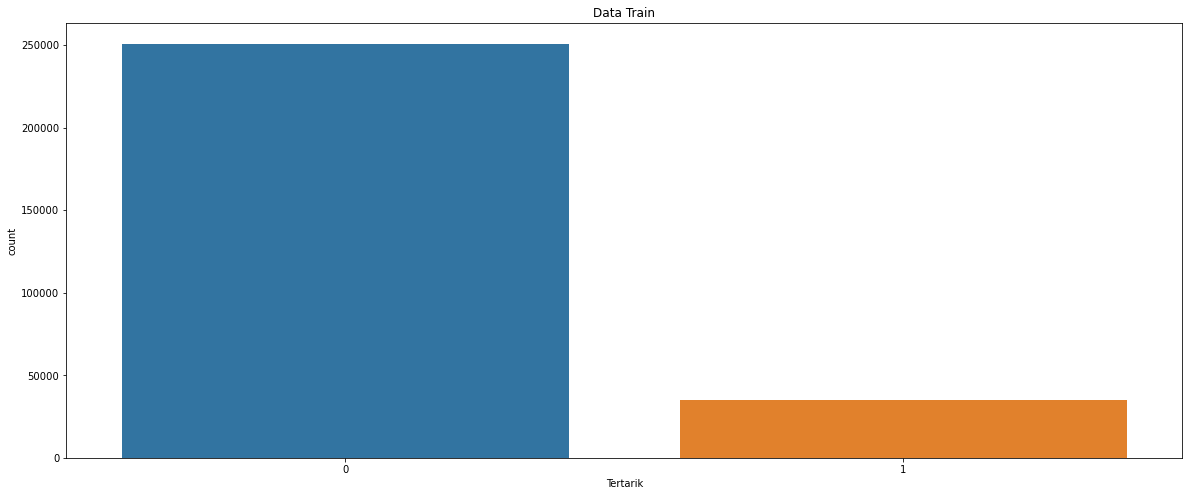

In [109]:
plt.figure(figsize=(20,8))
sns.countplot(Y)
plt.title("Data Train")

## Data Balancing

In [110]:
over = RandomOverSampler(sampling_strategy=0.4)
X_balanced, Y_balanced = over.fit_resample(X, Y)
under = RandomUnderSampler(sampling_strategy=0.6)
X_balanced, Y_balanced = under.fit_resample(X, Y)

C:\Users\salazarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Data Train Balanced')

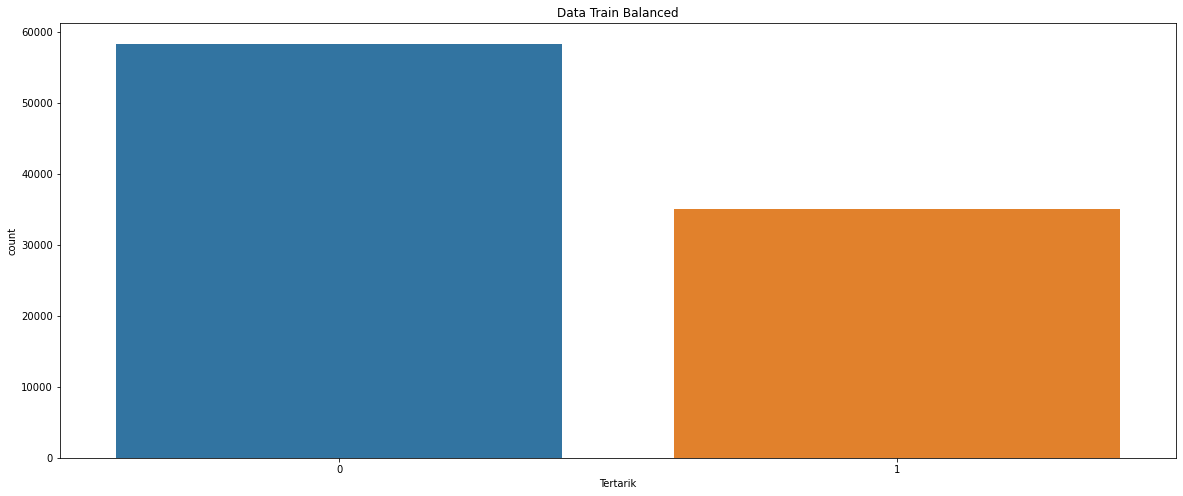

In [111]:
plt.figure(figsize=(20,8))
sns.countplot(Y_balanced)
plt.title("Data Train Balanced")

## Normalize Data for Modeling

In [112]:
scaler = MinMaxScaler()
scaler.fit(X_balanced)
X_Scale = scaler.fit_transform(X_balanced)

X_test = scaler.transform(X_test)

In [113]:
X_Scale.shape

(93349, 12)

# Random Forest Model - Balanced

## Hyperparameter Tuning

In [114]:
# banyaknya tree
n_estimators = [50, 100, 200]
# banyaknya features
max_features = [0.5]
# maksimum level
max_depth = [20, 22, 24]
min_samples_split = [2]
min_samples_leaf = [1,2,3]
bootstrap = [True]

In [115]:
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}

In [116]:
RF = RandomForestClassifier()

In [30]:
rf_grid = GridSearchCV(estimator = RF, param_grid = random_grid, cv = 5, verbose = 4, n_jobs = -1 )

In [ ]:
rf_grid.fit(X_Scale, Y_balanced)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=0.5,
                                              n_estimators=50, n_jobs=-1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 22, 24],
                         'max_features': [0.5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 200]},
             verbose=4)

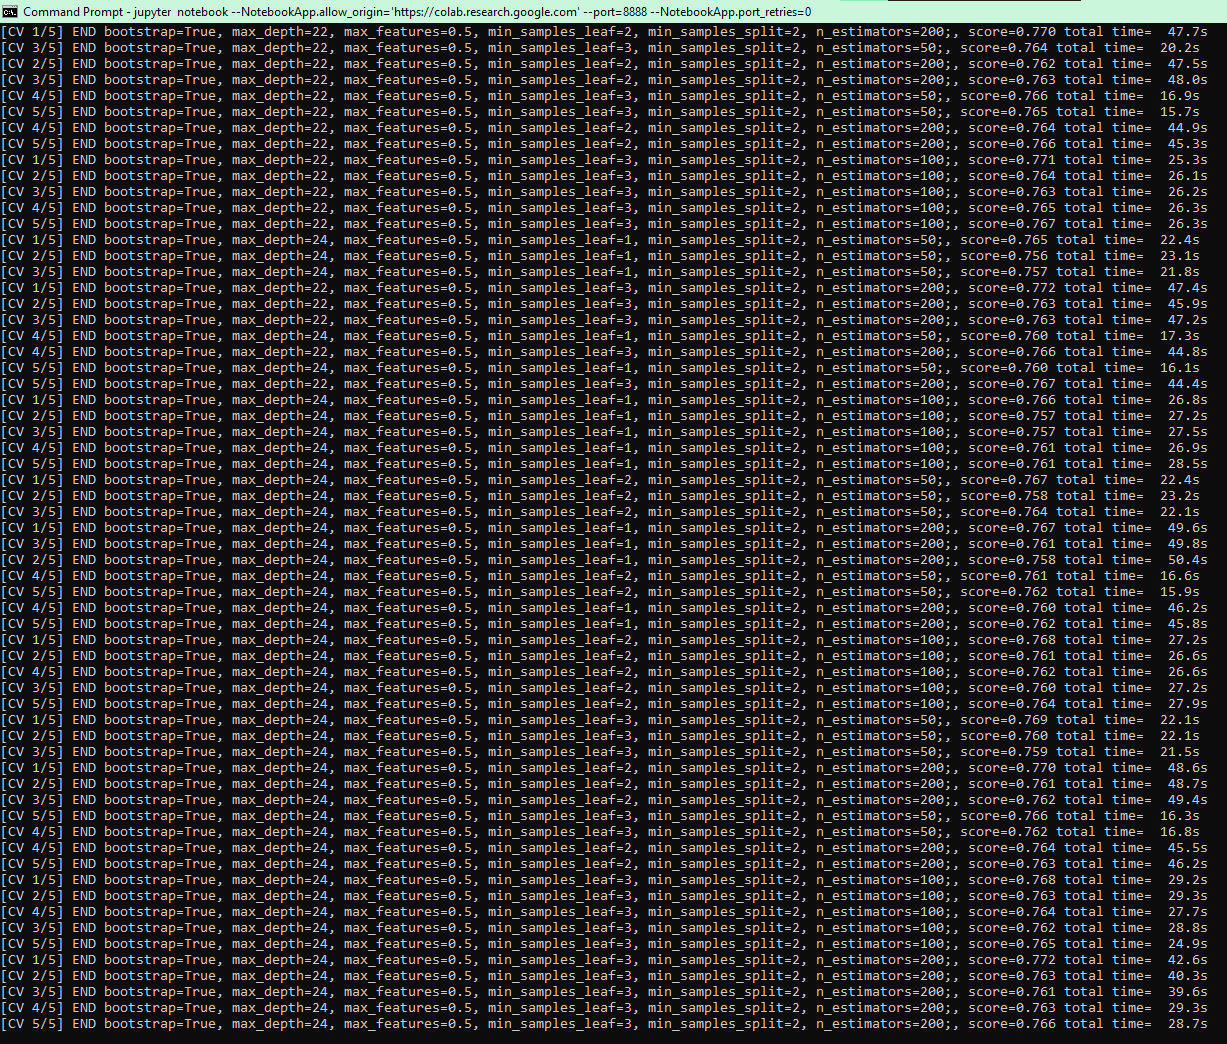

In [ ]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 0.5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

## Training Model

In [117]:
RF = RandomForestClassifier(n_estimators=100, max_depth=20, bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=2, n_jobs=-1)

In [118]:
RF.fit(X_Scale, Y_balanced)

RandomForestClassifier(max_depth=20, max_features=0.5, min_samples_leaf=3,
                       n_jobs=-1)

  ## Evaluasi

In [119]:
y_pred=RF.predict(X_test)

In [121]:
print('Accuracy', metrics.accuracy_score(Y_test, y_pred))

Accuracy 0.7533743361531519


In [144]:
print("Jumlah Prediksi Tidak Tertarik",pd.DataFrame(y_pred).value_counts()[0])
print("Jumlah Prediksi Tertarik",pd.DataFrame(y_pred).value_counts()[1]) 

Jumlah Prediksi Tidak Tertarik 32131
Jumlah Prediksi Tertarik 15508


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

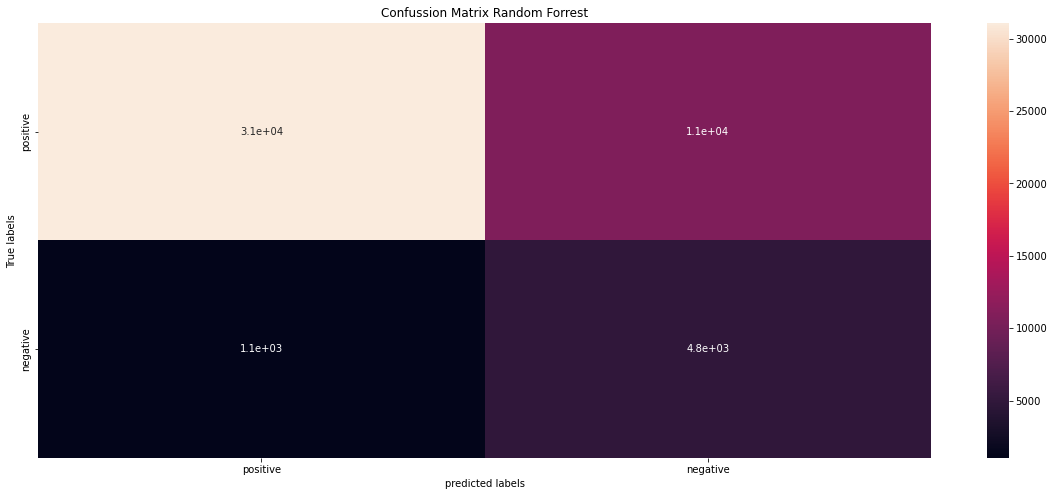

In [140]:
plt.figure(figsize=(20,8))
ax= plt.subplot()
y_pred = (y_pred > 0.5)
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confussion Matrix Random Forrest')
ax.xaxis.set_ticklabels(['positive', 'negative'])
ax.yaxis.set_ticklabels(['positive', 'negative'])

In [123]:
print(metrics.classification_report(Y_test, y_pred, labels=[False, True]))

              precision    recall  f1-score   support

       False       0.97      0.74      0.84     41778
        True       0.31      0.82      0.45      5861

    accuracy                           0.75     47639
   macro avg       0.64      0.78      0.65     47639
weighted avg       0.89      0.75      0.79     47639



# Random Forest Model - Imbalanced

## Hyperparameter Tuning

In [124]:
scaler.fit(X)
X_ScaleImbalanced = scaler.fit_transform(X)

In [125]:
RF_imbalanced = RandomForestClassifier()
rf_grid_imbalanced = GridSearchCV(estimator = RF_imbalanced, param_grid = random_grid, cv = 5, verbose = 4, n_jobs = -1 )

In [48]:
rf_grid_imbalanced.fit(X_ScaleImbalanced, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 22, 24],
                         'max_features': [0.5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 200]},
             verbose=4)

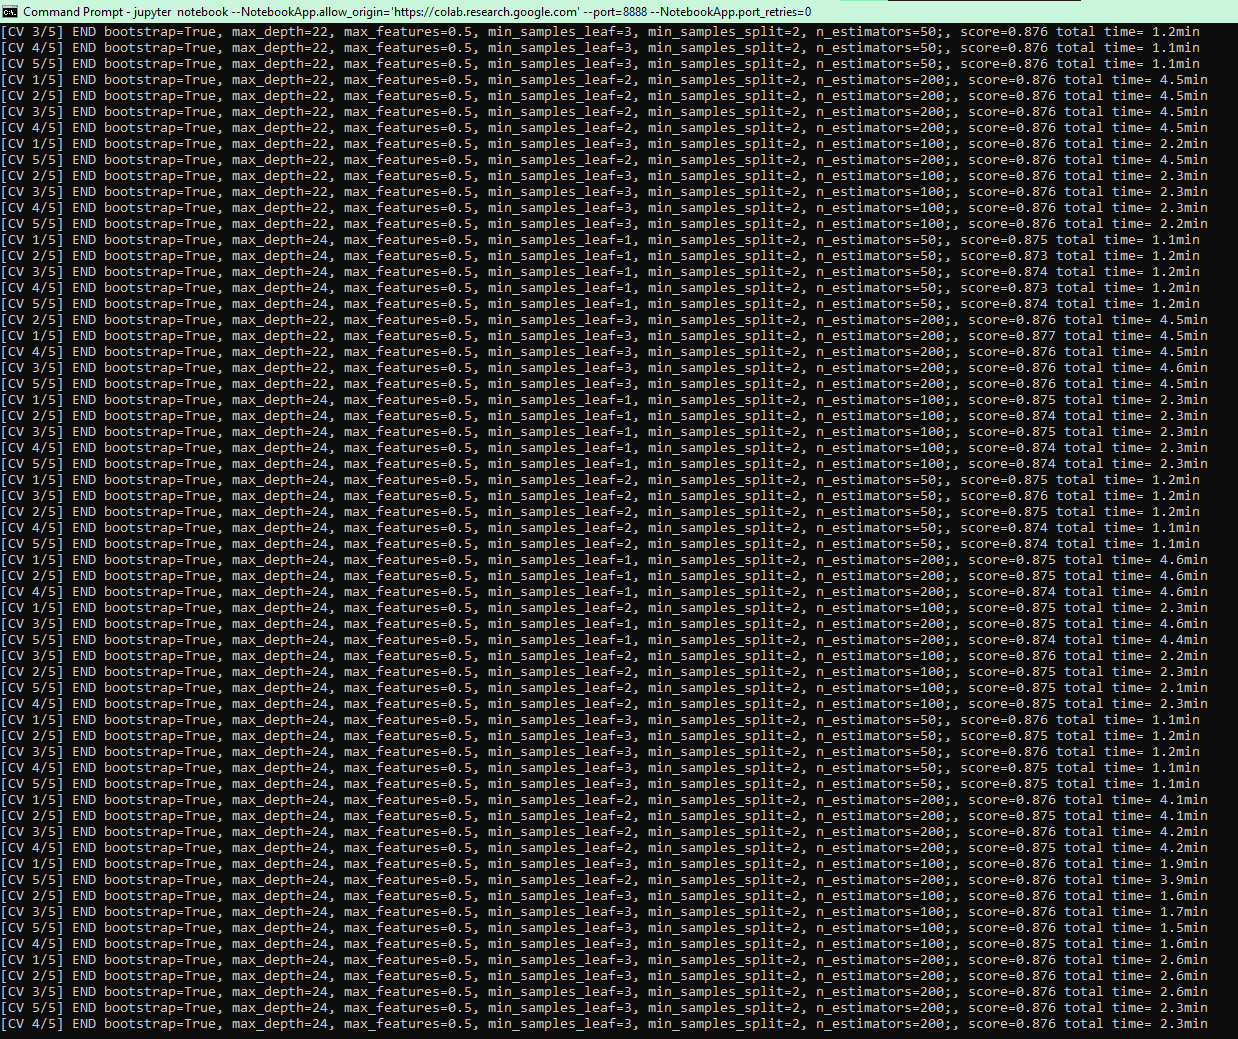

In [50]:
rf_grid_imbalanced.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 0.5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

## Training Model

In [126]:
RF_imbalanced = RandomForestClassifier(n_estimators=100, max_depth=20, bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=2, n_jobs=-1)

In [127]:
RF_imbalanced.fit(X_ScaleImbalanced, Y)

RandomForestClassifier(max_depth=20, max_features=0.5, min_samples_leaf=3,
                       n_jobs=-1)

## Evaluasi

In [147]:
y_pred_imbalanced=RF_imbalanced.predict(X_test)

In [148]:
print('Accuracy', metrics.accuracy_score(Y_test, y_pred_imbalanced))

Accuracy 0.8764877516320662


In [149]:
print("Jumlah Prediksi Tidak Tertarik",pd.DataFrame(y_pred_imbalanced).value_counts()[0])
print("Jumlah Prediksi Tertarik",pd.DataFrame(y_pred_imbalanced).value_counts()[1]) 

Jumlah Prediksi Tidak Tertarik 47314
Jumlah Prediksi Tertarik 325


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

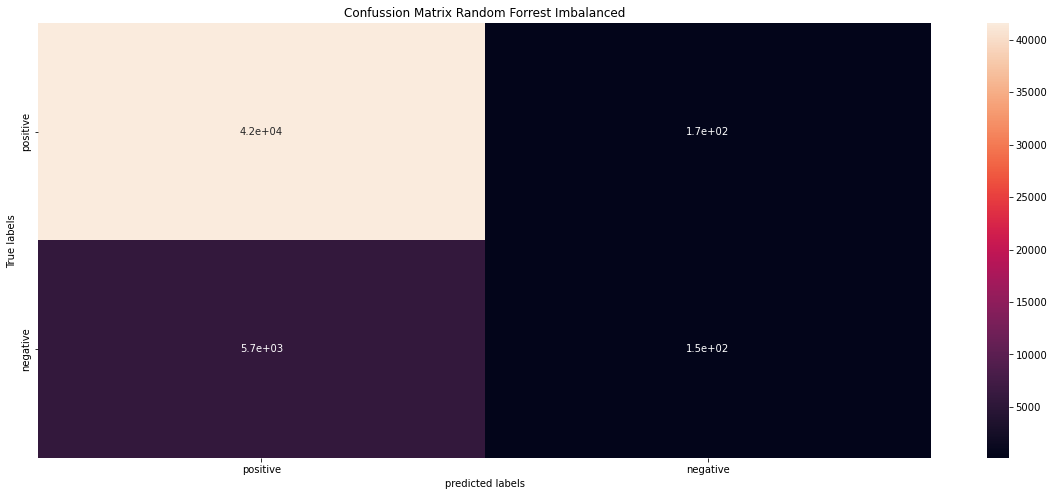

In [141]:
plt.figure(figsize=(20,8))
ax= plt.subplot()
y_pred_imbalanced = (y_pred_imbalanced > 0.5)
cm = confusion_matrix(Y_test,y_pred_imbalanced)
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confussion Matrix Random Forrest Imbalanced')
ax.xaxis.set_ticklabels(['positive', 'negative'])
ax.yaxis.set_ticklabels(['positive', 'negative'])

In [150]:
print(metrics.classification_report(Y_test, y_pred_imbalanced, labels=[False, True]))

              precision    recall  f1-score   support

       False       0.88      1.00      0.93     41778
        True       0.46      0.03      0.05      5861

    accuracy                           0.88     47639
   macro avg       0.67      0.51      0.49     47639
weighted avg       0.83      0.88      0.83     47639



# Decision Tree - Balanced

## Hyperparameter Tuning

In [151]:
max_features = ['sqrt', 'log2']
#maksimum level
max_depth = [1,2,3,4,5,6,7,8,9]
min_samples_split = [3,4,5,6,7,8,9,10,11]
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
criterion = ['gini', 'entropy']

In [152]:
random_grid = {
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'criterion': criterion}

In [154]:
dct_model = DecisionTreeClassifier()

In [155]:
dct_grid = GridSearchCV(estimator = dct_model, param_grid = random_grid, cv = 3, verbose = 2, n_jobs = -1 )

In [156]:
dct_grid.fit(X_Scale, Y_balanced)

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


C:\Users\salazarz\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.67429727 0.65020541 0.64379867 ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'None'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             verbose=2)

In [157]:
dct_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

## Training Model

In [158]:
dct_model = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2', min_samples_leaf=2, min_samples_split=5)  

In [159]:
dct_model.fit(X_Scale,Y_balanced)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5)

## Evaluasi

In [160]:
y_predict_dct = dct_model.predict(X_test)

In [161]:
print('Accuracy', metrics.accuracy_score(Y_test, y_predict_dct))

Accuracy 0.7349020760301433


In [162]:
print("Jumlah Prediksi Tidak Tertarik",pd.DataFrame(y_predict_dct).value_counts()[0])
print("Jumlah Prediksi Tertarik",pd.DataFrame(y_predict_dct).value_counts()[1]) 

Jumlah Prediksi Tidak Tertarik 30949
Jumlah Prediksi Tertarik 16690


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

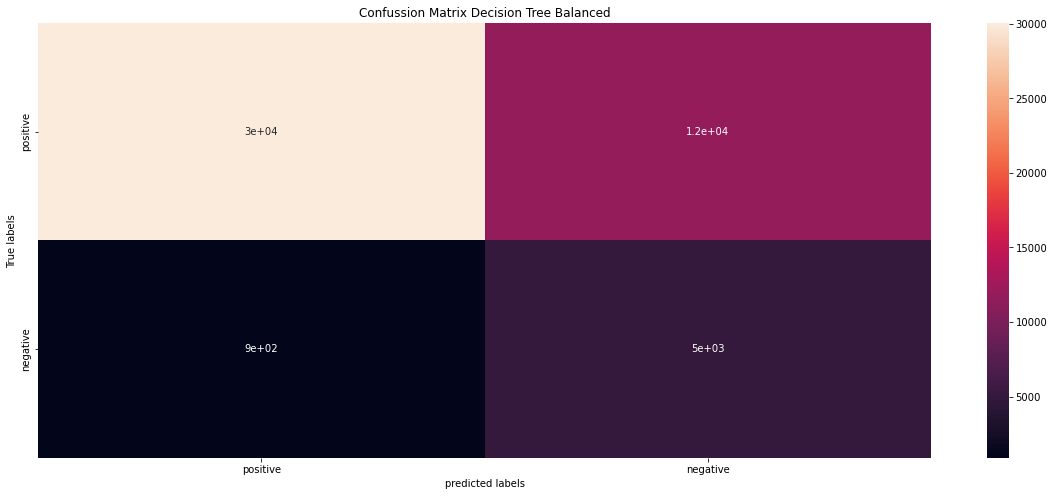

In [165]:
plt.figure(figsize=(20,8))
ax= plt.subplot()
y_predict_dct = (y_predict_dct > 0.5)
cm = confusion_matrix(Y_test,y_predict_dct)
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confussion Matrix Decision Tree Balanced')
ax.xaxis.set_ticklabels(['positive', 'negative'])
ax.yaxis.set_ticklabels(['positive', 'negative'])

In [179]:
print(metrics.classification_report(Y_test, y_predict_dct, labels=[False, True]))

              precision    recall  f1-score   support

       False       0.97      0.72      0.83     41778
        True       0.30      0.85      0.44      5861

    accuracy                           0.73     47639
   macro avg       0.63      0.78      0.63     47639
weighted avg       0.89      0.73      0.78     47639



# Decision Tree - Imbalanced

## Hyperparameter Tuning

In [167]:
dct_model_imbalanced = DecisionTreeClassifier()

In [168]:
dct_grid_imbalanced = GridSearchCV(estimator = dct_model_imbalanced, param_grid = random_grid, cv = 3, verbose = 2, n_jobs = 4 )

In [169]:
dct_grid_imbalanced.fit(X_ScaleImbalanced, Y)

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


C:\Users\salazarz\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.87752903 0.87752903 0.87752903 ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'None'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             verbose=2)

In [170]:
dct_grid_imbalanced.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 6}

## Training Model

In [171]:
dct_model_imbalanced = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2', min_samples_leaf=3, min_samples_split=6)  

In [172]:
dct_model_imbalanced.fit(X_ScaleImbalanced, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=3, min_samples_split=6)

## Evaluasi

In [173]:
y_predict_dct_imbalanced = dct_model_imbalanced.predict(X_test)

In [174]:
print('Accuracy', metrics.accuracy_score(Y_test, y_predict_dct_imbalanced))

Accuracy 0.8769285669304562


In [175]:
print("Jumlah Prediksi Tidak Tertarik",pd.DataFrame(y_predict_dct_imbalanced).value_counts()[0])
print("Jumlah Prediksi Tertarik",pd.DataFrame(y_predict_dct_imbalanced).value_counts()[1]) 

Jumlah Prediksi Tidak Tertarik 47633
Jumlah Prediksi Tertarik 6


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

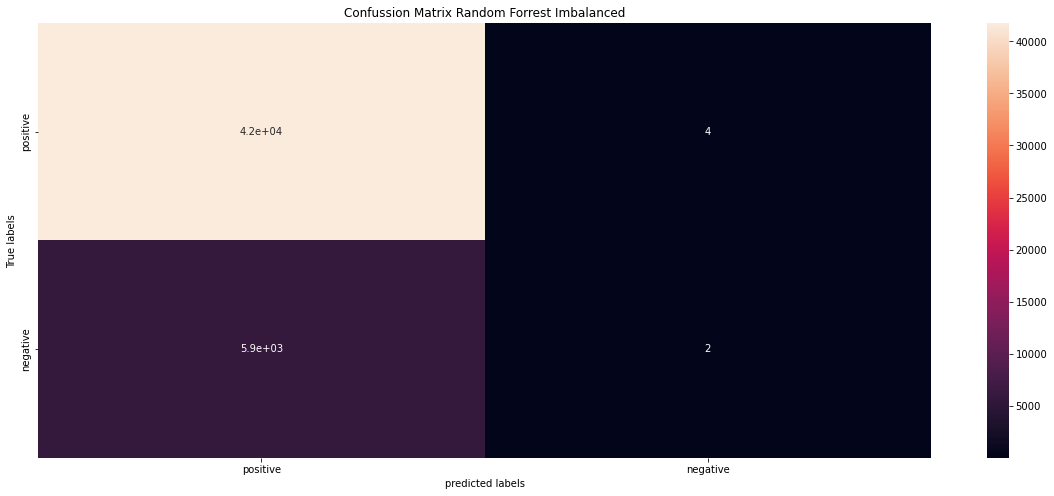

In [176]:
plt.figure(figsize=(20,8))
ax= plt.subplot()
y_predict_dct_imbalanced = (y_predict_dct_imbalanced > 0.5)
cm = confusion_matrix(Y_test,y_predict_dct_imbalanced)
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confussion Matrix Random Forrest Imbalanced')
ax.xaxis.set_ticklabels(['positive', 'negative'])
ax.yaxis.set_ticklabels(['positive', 'negative'])

In [177]:
print(metrics.classification_report(Y_test, y_predict_dct_imbalanced, labels=[False, True]))

              precision    recall  f1-score   support

       False       0.88      1.00      0.93     41778
        True       0.33      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.61      0.50      0.47     47639
weighted avg       0.81      0.88      0.82     47639

